In [9]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [1]:
import pandas as pd

# Load the CSV, skipping malformed rows
file_path = '/content/final_merged_homeless_data.csv'
df = pd.read_csv(file_path, on_bad_lines='skip')  # Use error_bad_lines=False for older pandas versions

# Show basic structure
print("First 5 rows:\n", df.head())

# Dataset info
print("\nDataset Info:")
df.info()

# Explore geographic and time-related fields if they exist
for col in ['County', 'State', 'FIPS Code', 'Year']:
    if col in df.columns:
        print(f"\nUnique values in '{col}':", df[col].nunique())
        print(f"Sample values in '{col}':", df[col].unique()[:5])


<ipython-input-1-79e3939655af>:5: DtypeWarning: Columns (20,23,24,25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')  # Use error_bad_lines=False for older pandas versions


First 5 rows:
                 encountertype hospitalcounty  oshpdid  \
0  Inpatient Hospitalizations        Alameda  10735.0   
1  Inpatient Hospitalizations        Alameda  10735.0   
2  Inpatient Hospitalizations        Alameda  10735.0   
3  Inpatient Hospitalizations        Alameda  10735.0   
4  Inpatient Hospitalizations        Alameda  10739.0   

                                        facilityname                 system  \
0                                   Alameda Hospital  Alameda Health System   
1                                   Alameda Hospital  Alameda Health System   
2                                   Alameda Hospital  Alameda Health System   
3                                   Alameda Hospital  Alameda Health System   
4  Alta Bates Summit Medical Center-Alta Bates Ca...          Sutter Health   

    ownership urbanrural      teaching licensedbedsize  \
0  Government      Urban  Non-Teaching         100-199   
1  Government      Urban  Non-Teaching         100-

In [2]:
import pandas as pd
import numpy as np

# Load the dataset, skipping any malformed rows
file_path = '/content/final_merged_homeless_data.csv'
df = pd.read_csv(file_path, on_bad_lines='skip')

# --- 1. Rename columns to lowercase & strip spaces ---
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# --- 2. Standardize county/state names (if present) ---
for col in ['county', 'state']:
    if col in df.columns:
        df[col] = df[col].str.strip().str.title()

# --- 3. Convert 'year' column to numeric (if exists) ---
if 'year' in df.columns:
    df['year'] = pd.to_numeric(df['year'], errors='coerce')

# --- 4. Handle missing values ---
# Show % of missing values
missing_percent = df.isnull().mean() * 100
print("Missing data (%):\n", missing_percent[missing_percent > 0].sort_values())

# Fill missing numeric values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')

# --- 5. Remove duplicates ---
df.drop_duplicates(inplace=True)

# --- 6. Standardize numeric formatting ---
df[numeric_cols] = df[numeric_cols].round(2)

# --- 7. Preview cleaned data ---
print("\nCleaned dataset preview:")
print(df.head())


<ipython-input-2-e298dd30a4ca>:6: DtypeWarning: Columns (20,23,24,25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Missing data (%):
 encountertype               16.742251
demographicvalue            16.742251
demographic                 16.742251
source                      16.742251
ownership                   16.852782
urbanrural                  16.852782
oshpdid                     16.852782
hospitalcounty              16.852782
homelessindicator           16.852782
teaching                    16.852782
licensedbedsize             16.852782
primarycareshortagearea     16.852782
encounters                  16.852782
mentalhealthshortagearea    16.852782
totalencounters             16.852782
facilityname                16.852782
percent                     16.852782
system                      46.254125
age_group_mapped            75.818013
category                    83.257749
calendar_year               83.257749
group                       83.257749
location_id                 83.257749
count                       86.490792
subgroup                    91.885698
location                    94.

In [3]:
import pandas as pd

# Load the data safely
df = pd.read_csv('/content/final_merged_homeless_data.csv', on_bad_lines='skip', low_memory=False)

# Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated(keep='first')]

# Display column names to verify
print("Columns before fixing:", df.columns.tolist())

# Drop the incorrect or unused 'year' column (to avoid conflict)
if 'year' in df.columns and 'CALENDAR_YEAR' in df.columns:
    df = df.drop(columns=['year'])

# Rename CALENDAR_YEAR → year
df = df.rename(columns={'CALENDAR_YEAR': 'year'})

# Now process the 'year' safely
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df[df['year'].notna()]
df['year'] = df['year'].astype(int)

# Fix county column
df = df.rename(columns={'LOCATION': 'county'})
df['county'] = df['county'].astype(str).str.strip().str.upper()

# Add state and unified key
df['state'] = 'CA'
df['geo_year_id'] = df['state'] + '_' + df['county'] + '_' + df['year'].astype(str)

# Preview cleaned output
print(df[['state', 'county', 'year', 'geo_year_id']].head())


Columns before fixing: ['encountertype', 'hospitalcounty', 'oshpdid', 'facilityname', 'system', 'ownership', 'urbanrural', 'teaching', 'licensedbedsize', 'primarycareshortagearea', 'mentalhealthshortagearea', 'homelessindicator', 'demographic', 'demographicvalue', 'encounters', 'totalencounters', 'percent', 'source', 'age_group_mapped', 'dataset', 'year', 'homeless', 'all', 'CALENDAR_YEAR', 'CATEGORY', 'GROUP', 'SUBGROUP', 'COUNT', 'LOCATION_ID', 'LOCATION']
      state county  year  geo_year_id
52463    CA    NAN  2017  CA_NAN_2017
52464    CA    NAN  2017  CA_NAN_2017
52465    CA    NAN  2017  CA_NAN_2017
52466    CA    NAN  2017  CA_NAN_2017
52467    CA    NAN  2017  CA_NAN_2017


<ipython-input-10-1270b20ec22f>:6: DtypeWarning: Columns (20,23,24,25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_merged_homeless_data.csv")


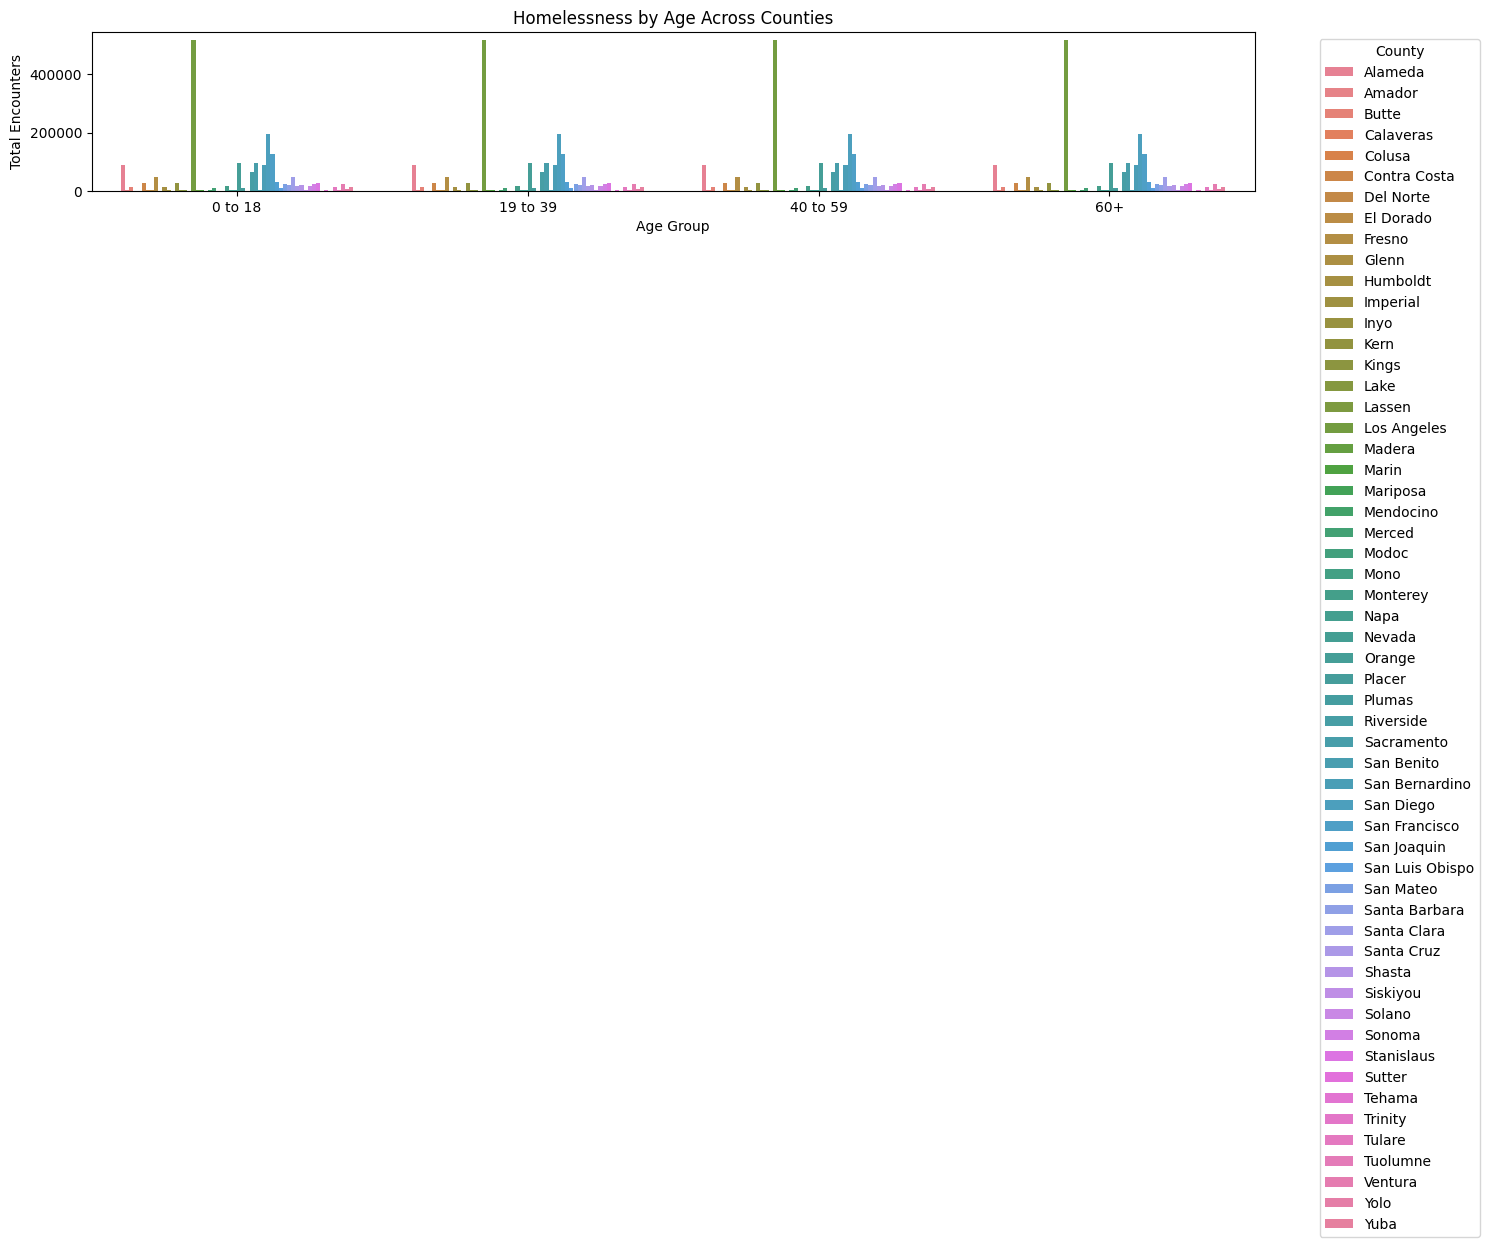

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("final_merged_homeless_data.csv")

# Filter for relevant demographic data (homeless individuals by age)
demographics = df[(df['homelessindicator'] == 'Homeless') & (df['demographic'] == 'Age')]

# Check if data exists
if demographics.empty:
    print("No data available for demographic trends.")
else:
    # Aggregate data by age group and county
    age_trends = demographics.groupby(['demographicvalue', 'hospitalcounty'])['totalencounters'].sum().reset_index()

    # Plotting demographic trends by age across counties
    plt.figure(figsize=(15, 8))
    sns.barplot(data=age_trends, x='demographicvalue', y='totalencounters', hue='hospitalcounty')
    plt.title("Homelessness by Age Across Counties")
    plt.xlabel("Age Group")
    plt.ylabel("Total Encounters")
    plt.legend(title="County", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


<ipython-input-12-fddbdb6455b2>:6: DtypeWarning: Columns (20,23,24,25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_merged_homeless_data.csv")


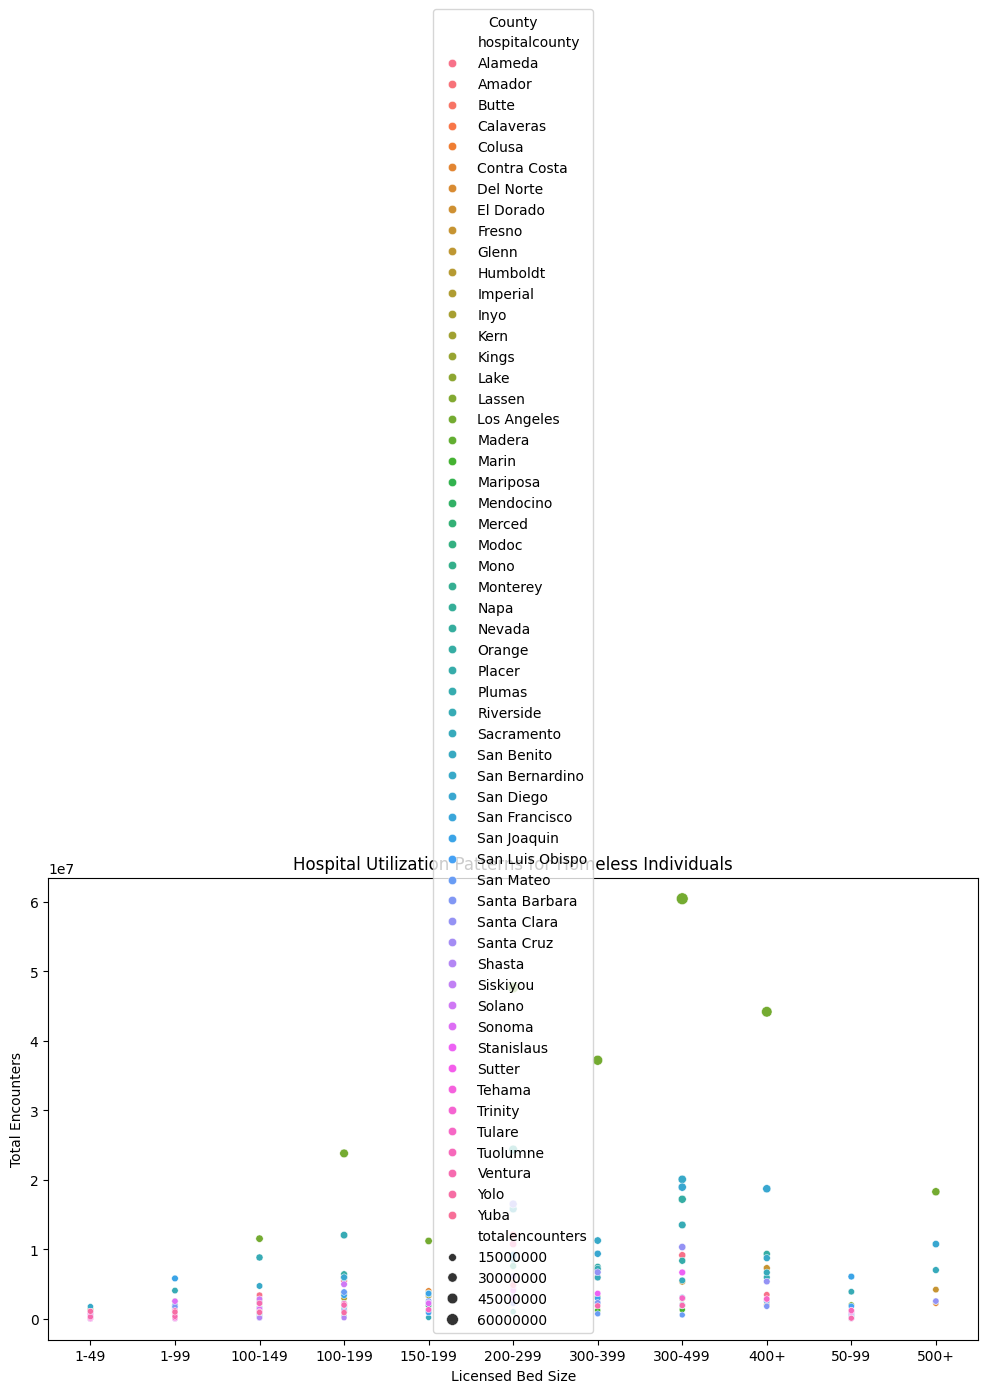

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("final_merged_homeless_data.csv")

# Group data by county to analyze service burden and availability
hospital_utilization = df.groupby(['hospitalcounty', 'licensedbedsize'])['totalencounters'].sum().reset_index()

# Visualize hospital utilization patterns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hospital_utilization, x='licensedbedsize', y='totalencounters', hue='hospitalcounty', size='totalencounters')
plt.title("Hospital Utilization Patterns for Homeless Individuals")
plt.xlabel("Licensed Bed Size")
plt.ylabel("Total Encounters")
plt.legend(title="County")
plt.show()


<ipython-input-35-e606f3842010>:7: DtypeWarning: Columns (20,23,24,25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


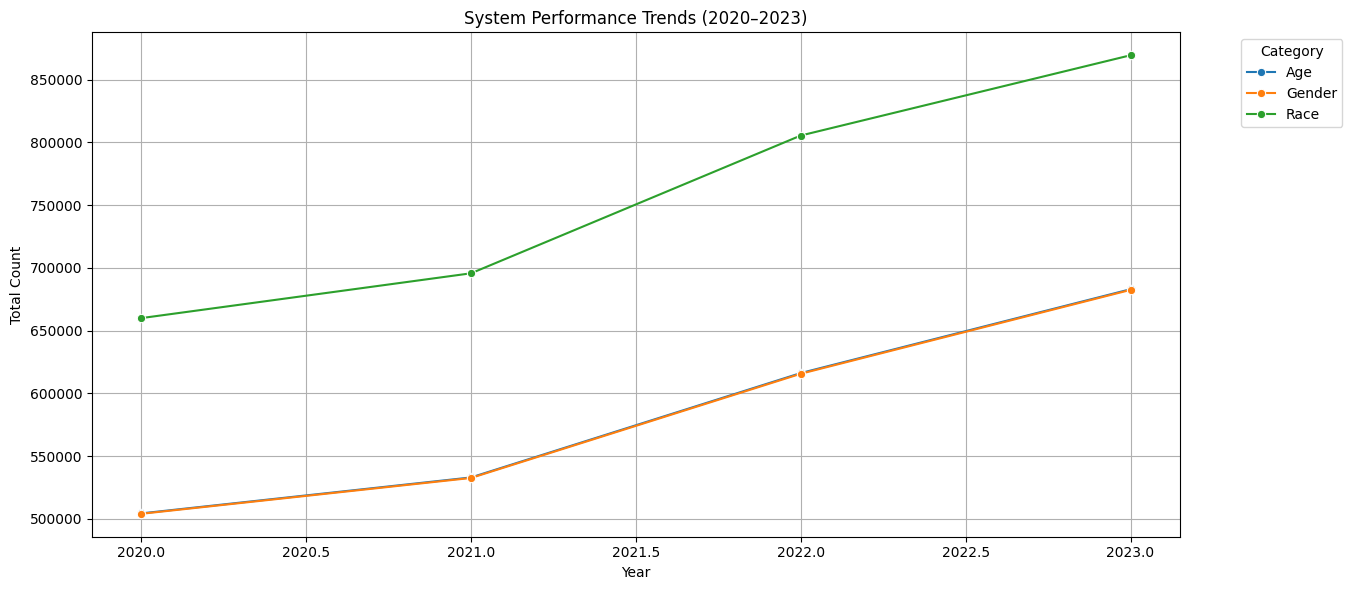

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/final_merged_homeless_data.csv"
df = pd.read_csv(file_path)

# Convert CALENDAR_YEAR to numeric, ignoring errors
df["CALENDAR_YEAR"] = pd.to_numeric(df["CALENDAR_YEAR"], errors="coerce")

# Filter data for the years 2020 to 2023
df_filtered = df[(df["CALENDAR_YEAR"] >= 2020) & (df["CALENDAR_YEAR"] <= 2023)]

# Group by year and category, and aggregate the COUNT values
performance_trends = (
    df_filtered.groupby(["CALENDAR_YEAR", "CATEGORY"])["COUNT"]
    .sum()
    .reset_index()
)

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=performance_trends,
    x="CALENDAR_YEAR",
    y="COUNT",
    hue="CATEGORY",
    marker="o"
)
plt.title("System Performance Trends (2020–2023)")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [36]:
import pandas as pd

# Load the dataset
file_path = "/content/final_merged_homeless_data.csv"
df = pd.read_csv(file_path)

# Create a copy to preserve the original
df_engineered = df.copy()

# ---------------------------
# Feature 1: Access Burden Score
# ---------------------------
# Add 1 point each for: Rural area, Primary care shortage, Mental health shortage
df_engineered["access_burden_score"] = (
    (df_engineered["urbanrural"] == "Rural").astype(int) +
    (df_engineered["primarycareshortagearea"] == "Yes").astype(int) +
    (df_engineered["mentalhealthshortagearea"] == "Yes").astype(int)
)

# ---------------------------
# Feature 2: Vulnerability Score
# ---------------------------
# Add 1 for homeless indicator, and 1 if demographic value is in a vulnerable group
vulnerable_groups = ["Black", "Latino", "Latinx", "65+", "Elderly", "Disabled", "Veteran"]
df_engineered["vulnerability_score"] = (
    (df_engineered["homelessindicator"] == "Yes").astype(int) +
    df_engineered["demographicvalue"].fillna("").apply(
        lambda x: int(any(group in x for group in vulnerable_groups))
    )
)

# ---------------------------
# Feature 3: Service Capacity Score
# ---------------------------
# Add 1 for: Teaching hospital, Large bed size (300+), Large health system
large_systems = ["Kaiser Permanente", "Sutter Health", "Dignity Health"]
df_engineered["service_capacity_score"] = (
    (df_engineered["teaching"] == "Teaching").astype(int) +
    df_engineered["licensedbedsize"].fillna("").apply(
        lambda x: 1 if "-" in x and int(x.split("-")[-1]) >= 300 else 0
    ) +
    df_engineered["system"].fillna("").apply(
        lambda x: int(x in large_systems)
    )
)

# ---------------------------
# Preview new features
# ---------------------------
print(df_engineered[[
    "urbanrural", "primarycareshortagearea", "mentalhealthshortagearea",
    "homelessindicator", "demographicvalue", "teaching", "licensedbedsize", "system",
    "access_burden_score", "vulnerability_score", "service_capacity_score"
]].head())


<ipython-input-36-f1533e08ec01>:5: DtypeWarning: Columns (20,23,24,25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  urbanrural primarycareshortagearea mentalhealthshortagearea  \
0      Urban                      No                       No   
1      Urban                      No                       No   
2      Urban                      No                       No   
3      Urban                      No                       No   
4      Urban                      No                       No   

  homelessindicator demographicvalue      teaching licensedbedsize  \
0          Homeless          0 to 18  Non-Teaching         100-199   
1          Homeless         19 to 39  Non-Teaching         100-199   
2          Homeless         40 to 59  Non-Teaching         100-199   
3          Homeless              60+  Non-Teaching         100-199   
4          Homeless          0 to 18  Non-Teaching         300-399   

                  system  access_burden_score  vulnerability_score  \
0  Alameda Health System                    0                    0   
1  Alameda Health System                    0   

In [37]:
import pandas as pd

# Load dataset
file_path = "/content/final_merged_homeless_data.csv"
df = pd.read_csv(file_path)

# Convert CALENDAR_YEAR to numeric
df["CALENDAR_YEAR"] = pd.to_numeric(df["CALENDAR_YEAR"], errors="coerce")

# Filter relevant years (2020–2023)
df_trend = df[df["CALENDAR_YEAR"].between(2020, 2023)]

# Group by year and category, sum the count
grouped = df_trend.groupby(["CATEGORY", "CALENDAR_YEAR"])["COUNT"].sum().reset_index()

# Sort for time-series operations
grouped.sort_values(by=["CATEGORY", "CALENDAR_YEAR"], inplace=True)

# Year-over-Year percentage change
grouped["YoY_pct_change"] = grouped.groupby("CATEGORY")["COUNT"].pct_change() * 100

# 3-year rolling average (smoothing)
grouped["rolling_avg_3yr"] = grouped.groupby("CATEGORY")["COUNT"].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Directional trend indicator
grouped["direction"] = grouped["YoY_pct_change"].apply(
    lambda x: "Increase" if x > 0 else "Decrease" if x < 0 else "No Change"
)

# Show the trend-based features
print(grouped.head(10))


  CATEGORY  CALENDAR_YEAR     COUNT  YoY_pct_change  rolling_avg_3yr  \
0      Age         2020.0  504288.0             NaN    504288.000000   
1      Age         2021.0  532947.0        5.683062    518617.500000   
2      Age         2022.0  616141.0       15.610183    551125.333333   
3      Age         2023.0  682952.0       10.843460    610680.000000   
4   Gender         2020.0  503958.0             NaN    503958.000000   
5   Gender         2021.0  532523.0        5.668131    518240.500000   
6   Gender         2022.0  615590.0       15.598763    550690.333333   
7   Gender         2023.0  682423.0       10.856739    610178.666667   
8     Race         2020.0  659942.0             NaN    659942.000000   
9     Race         2021.0  695660.0        5.412294    677801.000000   

   direction  
0  No Change  
1   Increase  
2   Increase  
3   Increase  
4  No Change  
5   Increase  
6   Increase  
7   Increase  
8  No Change  
9   Increase  


<ipython-input-37-8bf390c26ee4>:5: DtypeWarning: Columns (20,23,24,25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<ipython-input-47-703c2481120d>:9: DtypeWarning: Columns (20,23,24,25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


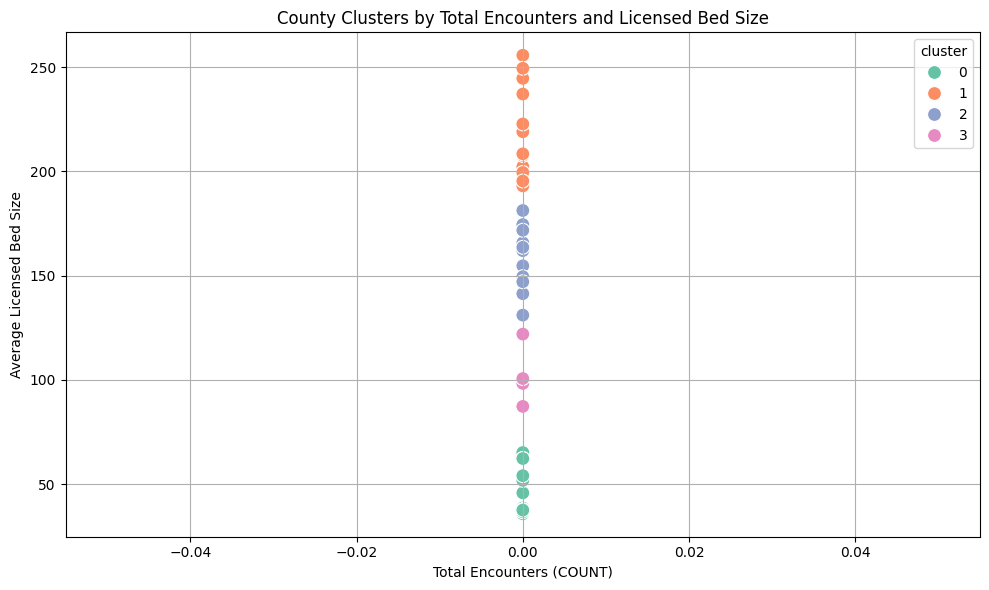

Cluster Characterization:
          COUNT  licensedbedsize
cluster                        
0          0.0        44.431380
1          0.0       216.537055
2          0.0       158.755284
3          0.0        99.167266

Number of counties in each cluster:
 cluster
0    20
2    16
1    14
3     6
Name: count, dtype: int64


In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/final_merged_homeless_data.csv"
df = pd.read_csv(file_path)

# Function to extract numeric value from "licensedbedsize" (assuming it contains ranges like "200-299")
def extract_bed_size(value):
    if isinstance(value, str):
        # Handle ranges like "200-299", take the midpoint
        if '-' in value:
            try:
                lower, upper = value.split('-')
                return (int(lower) + int(upper)) / 2  # Midpoint of the range
            except ValueError:
                return None  # Handle any incorrect format
        elif value.isdigit():
            return int(value)  # If it's a single number
    return None  # In case of invalid data

# Apply the function to the 'licensedbedsize' column
df["licensedbedsize"] = df["licensedbedsize"].apply(extract_bed_size)

# Check if necessary columns are available
required_columns = ["COUNT", "hospitalcounty", "licensedbedsize"]

# Aggregate by hospitalcounty and calculate mean values
grouped_df = df.groupby("hospitalcounty")[required_columns].agg({
    "COUNT": "sum",
    "licensedbedsize": "mean",  # Average licensed bed size for the county
}).reset_index()

# Handle any NaN values by removing rows
grouped_df = grouped_df.dropna()

# Normalize the features (COUNT and licensedbedsize)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(grouped_df[["COUNT", "licensedbedsize"]])

# Apply KMeans clustering (assuming 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
grouped_df["cluster"] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped_df,
    x="COUNT",
    y="licensedbedsize",
    hue="cluster",
    palette="Set2",
    s=100
)
plt.title("County Clusters by Total Encounters and Licensed Bed Size")
plt.xlabel("Total Encounters (COUNT)")
plt.ylabel("Average Licensed Bed Size")
plt.grid(True)
plt.tight_layout()
plt.show()

# Characterize and interpret the resulting segments (clusters)
cluster_summary = grouped_df.groupby("cluster")[["COUNT", "licensedbedsize"]].mean()
print("Cluster Characterization:\n", cluster_summary)

# Optionally, show the number of counties in each cluster
cluster_counts = grouped_df["cluster"].value_counts()
print("\nNumber of counties in each cluster:\n", cluster_counts)


<ipython-input-71-76ee97f9cdcf>:13: DtypeWarning: Columns (20,23,24,25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-71-76ee97f9cdcf>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hospitalcounty'].fillna('Unknown', inplace=True)
<ipython-input-71-76ee97f9cdcf>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This i

Missing values in 'hospitalcounty': 10368
Missing values in 'COUNT': 53210
Variance Inflation Factor (VIF) results:
                 variable       VIF
0                   const  5.835423
1     access_burden_score  1.321715
2     vulnerability_score       NaN
3  service_capacity_score  1.321715
Mean Absolute Error: 78.72641794111794
                            OLS Regression Results                            
Dep. Variable:                  COUNT   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.552
Date:                Sun, 13 Apr 2025   Prob (F-statistic):             0.0873
Time:                        04:34:04   Log-Likelihood:                -374.01
No. Observations:                  57   AIC:                             754.0
Df Residuals:                      54   BIC:                             760.1
Df Model:                        

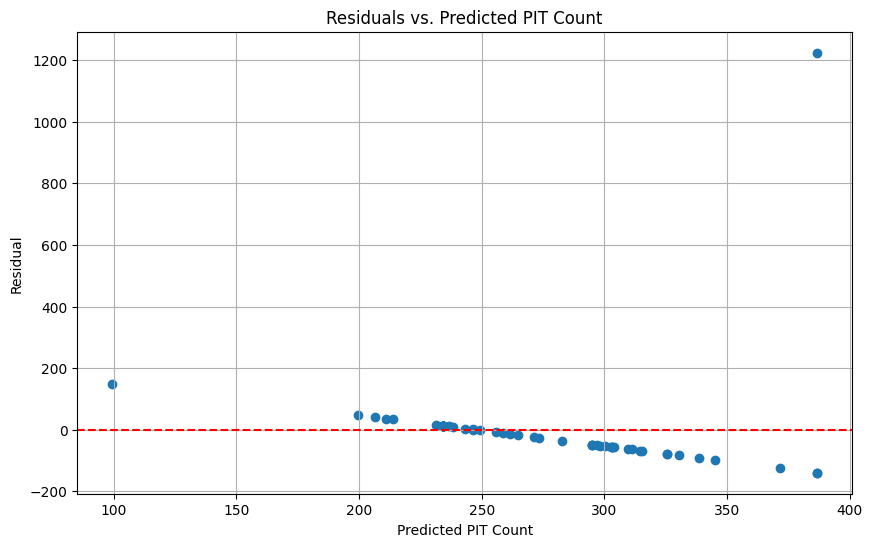

Counties with significant prediction deviations:
   hospitalcounty  predicted_pit     residual  standardized_residual
53        Alameda     386.636956  1224.326875               7.089919


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/final_merged_homeless_data.csv"
df = pd.read_csv(file_path)

# Check for missing values in 'hospitalcounty' and 'COUNT' columns
print(f"Missing values in 'hospitalcounty': {df['hospitalcounty'].isnull().sum()}")
print(f"Missing values in 'COUNT': {df['COUNT'].isnull().sum()}")

# Handle missing values
df['hospitalcounty'].fillna('Unknown', inplace=True)
df['COUNT'].fillna(df['COUNT'].median(), inplace=True)

# Feature Engineering for 'access_burden_score', 'vulnerability_score', and 'service_capacity_score'
df['access_burden_score'] = (
    (df['urbanrural'] == 'Rural/Frontier').astype(int) +
    (df['primarycareshortagearea'] == 'Yes').astype(int) +
    (df['mentalhealthshortagearea'] == 'Yes').astype(int)
)

vulnerable_groups = ['Age 0 to 18', 'Age 19 to 39', 'Age 40 to 59', 'Age 60+']
df['vulnerability_score'] = (
    (df['homelessindicator'] == 'Yes').astype(int) +
    df['demographicvalue'].fillna('').apply(lambda x: int(any(group in x for group in vulnerable_groups)))
)

df['service_capacity_score'] = (
    (df['teaching'] == 'Teaching').astype(int) +
    df['licensedbedsize'].apply(lambda x: 1 if '-' in str(x) and int(str(x).split('-')[-1]) >= 300 else 0) +
    df['system'].apply(lambda x: int(x in ['Large System 1', 'Large System 2']))  # Define large systems as needed
)

# Drop rows where 'hospitalcounty' or 'COUNT' are missing (if any remain after filling)
df_cleaned = df.dropna(subset=['hospitalcounty', 'COUNT'])

# Group data by 'hospitalcounty'
grouped_df = df_cleaned.groupby('hospitalcounty')[['access_burden_score', 'vulnerability_score', 'service_capacity_score', 'COUNT']].mean().reset_index()

# Check for multicollinearity using Variance Inflation Factor (VIF)
X = grouped_df[['access_burden_score', 'vulnerability_score', 'service_capacity_score']]
X = add_constant(X)  # Add constant for VIF calculation
vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(f"Variance Inflation Factor (VIF) results:\n{vif_data}")

# Prepare the feature matrix and target vector
X = grouped_df[['access_burden_score', 'vulnerability_score', 'service_capacity_score']]
y = grouped_df['COUNT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Print OLS regression results
X_const = sm.add_constant(X)  # Add constant for OLS regression
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

# Plot residuals vs. predicted values
data = pd.concat([X, y], axis=1)
data['predicted_pit'] = ols_model.predict(X_const)
data['residual'] = data['COUNT'] - data['predicted_pit']

plt.figure(figsize=(10, 6))
plt.scatter(data['predicted_pit'], data['residual'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted PIT Count')
plt.ylabel('Residual')
plt.title('Residuals vs. Predicted PIT Count')
plt.grid(True)
plt.show()

# Standardize residuals and find large deviations
data['standardized_residual'] = (data['residual'] - data['residual'].mean()) / data['residual'].std()
significant_residuals = data[abs(data['standardized_residual']) > 2]

# Now, merge significant_residuals with the original data using 'hospitalcounty' as the key
significant_residuals = significant_residuals.merge(df_cleaned[['hospitalcounty', 'access_burden_score', 'vulnerability_score',
                                                               'service_capacity_score', 'COUNT']],
                                                   left_index=True, right_index=True, how='left')

# Ensure columns exist for the print statement
print("Counties with significant prediction deviations:")
print(significant_residuals[['hospitalcounty', 'predicted_pit', 'residual', 'standardized_residual']].dropna())
